### Ablation study

In [ ]:
''' Copy predictions for computing metrics '''

import os
import shutil
from tqdm import tqdm
from natsort import natsorted

pred_folder = '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/predictions'
save_gt_folder = '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/ground-truth'
save_roi_folder = '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/roi-metadata'

os.makedirs(pred_folder, exist_ok=True)
os.makedirs(save_gt_folder, exist_ok=True)
os.makedirs(save_roi_folder, exist_ok=True)

seg_folder = '/home/hasna/miccai24_challenges/topcow_challenge/evals/final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best/steps'  #FIXME: 'cta' or 'mra'
gt_folder = '/home/hasna/datasets/TopCoW2024_Data_Release/cow_seg_labelsTr'
roi_folder = '/home/hasna/datasets/TopCoW2024_Data_Release/roi_loc_labelsTr'
nfolds = 5

step_name = 'step5_' # metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step5
for i in range(nfolds):
    for file in tqdm(natsorted(os.listdir(os.path.join(seg_folder, f'fold_{i}')))):
        if file.startswith(step_name):
            init_name = os.path.join(seg_folder, f'fold_{i}', file)
            new_name = os.path.join(pred_folder, file.split(step_name)[-1])
            # shutil.copy(init_name, new_name)

            init_name = os.path.join(gt_folder, file.split(step_name)[-1])
            new_name = os.path.join(save_gt_folder, file.split(step_name)[-1])
            # shutil.copy(init_name, new_name)

            init_name = os.path.join(roi_folder, (file.split(step_name)[-1]).split('.')[0]+'.txt')
            new_name = os.path.join(save_roi_folder, (file.split(step_name)[-1]).split('.')[0]+'.txt')
            # shutil.copy(init_name, new_name)

'''
REPLACE NUMBER IN HERE: 
/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/topcow24_eval/configs.py
'''

100%|██████████| 200/200 [00:00<00:00, 6653.61it/s]


100%|██████████| 200/200 [00:00<00:00, 7109.17it/s]


'\nREPLACE NUMBER IN HERE: \n/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/topcow24_eval/configs.py\n'

In [ ]:
''' Get the metrics in a table for MRA using different post-processing steps '''

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step1_mra.json', 'r') as file:
    metrics_step1 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2_mra.json', 'r') as file:
    metrics_step2 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2-0_mra.json', 'r') as file:
    metrics_step2_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3_mra.json', 'r') as file:
    metrics_step3 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3-0_mra.json', 'r') as file:
    metrics_step3_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step4-0_mra.json', 'r') as file:
    metrics_step4_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step5_mra.json', 'r') as file:
    metrics_step5 = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'step1', 'step2-0', 'step3-0', 'step4-0', 'step2', 'step3', 'step_5', 'with_pp']
}

df = pd.DataFrame()
nround = 3

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_without_pp['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step1['aggregates'][metric]['mean'], nround)} ± {round(metrics_step1['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step4_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step4_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step5['aggregates'][metric]['mean'], nround)} ± {round(metrics_step5['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_with_pp['aggregates'][metric]['std'], nround)}"
    ]
table_data['f1_score'] = [f"{round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step1['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step1['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step5['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step5['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
# Convert the dictionary into a DataFrame
df = pd.concat([df, pd.DataFrame(table_data)])
df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score
0,without_pp,0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181,0.793 ± 0.091
1,step1,0.866 ± 0.062,0.991 ± 0.012,0.189 ± 0.157,5.111 ± 5.186,0.802 ± 0.094
2,step2-0,0.871 ± 0.059,0.986 ± 0.016,0.124 ± 0.12,3.523 ± 4.401,0.851 ± 0.07
3,step3-0,0.852 ± 0.064,0.983 ± 0.017,0.098 ± 0.096,5.168 ± 5.18,0.793 ± 0.091
4,step4-0,0.869 ± 0.063,0.986 ± 0.016,0.046 ± 0.063,3.536 ± 4.466,0.854 ± 0.058
5,step2,0.883 ± 0.055,0.992 ± 0.011,0.122 ± 0.121,3.429 ± 4.164,0.855 ± 0.085
6,step3,0.882 ± 0.055,0.989 ± 0.014,0.067 ± 0.076,3.446 ± 4.172,0.855 ± 0.085
7,step_5,0.883 ± 0.06,0.993 ± 0.01,0.046 ± 0.058,3.349 ± 4.27,0.868 ± 0.064
8,with_pp,0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206,0.861 ± 0.075


In [13]:
''' Get the metrics in a table for CTA using different post-processing steps '''

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step1.json', 'r') as file:
    metrics_step1 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step2.json', 'r') as file:
    metrics_step2 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step2-0.json', 'r') as file:
    metrics_step2_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step3.json', 'r') as file:
    metrics_step3 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step3-0.json', 'r') as file:
    metrics_step3_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step4-0.json', 'r') as file:
    metrics_step4_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step5.json', 'r') as file:
    metrics_step5 = json.load(file)

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['without_pp', 'step1', 'step2-0', 'step3-0', 'step4-0', 'step2', 'step3', 'step_5', 'with_pp']
}

df = pd.DataFrame()
nround = 3

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(metrics_without_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_without_pp['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step1['aggregates'][metric]['mean'], nround)} ± {round(metrics_step1['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step4_0['aggregates'][metric]['mean'], nround)} ± {round(metrics_step4_0['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step2['aggregates'][metric]['mean'], nround)} ± {round(metrics_step2['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step3['aggregates'][metric]['mean'], nround)} ± {round(metrics_step3['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_step5['aggregates'][metric]['mean'], nround)} ± {round(metrics_step5['aggregates'][metric]['std'], nround)}",
        f"{round(metrics_with_pp['aggregates'][metric]['mean'], nround)} ± {round(metrics_with_pp['aggregates'][metric]['std'], nround)}"
    ]
table_data['f1_score'] = [f"{round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_without_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step1['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step1['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step4_0['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step2['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step2['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step3['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step3['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_step5['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_step5['aggregates']['dect_avg']['f1_score']['std'], nround)}",
                          f"{round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(metrics_with_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
# Convert the dictionary into a DataFrame
df = pd.concat([df, pd.DataFrame(table_data)])
df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score
0,without_pp,0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.209,6.987 ± 6.088,0.72 ± 0.167
1,step1,0.824 ± 0.07,0.985 ± 0.014,0.258 ± 0.209,6.86 ± 5.927,0.746 ± 0.144
2,step2-0,0.823 ± 0.074,0.975 ± 0.027,0.123 ± 0.119,4.302 ± 4.828,0.812 ± 0.121
3,step3-0,0.822 ± 0.074,0.973 ± 0.028,0.064 ± 0.077,4.312 ± 4.818,0.815 ± 0.122
4,step4-0,0.819 ± 0.075,0.976 ± 0.027,0.047 ± 0.06,4.564 ± 4.957,0.82 ± 0.105
5,step2,0.855 ± 0.065,0.988 ± 0.014,0.117 ± 0.121,4.002 ± 4.665,0.847 ± 0.096
6,step3,0.853 ± 0.066,0.984 ± 0.016,0.062 ± 0.075,4.02 ± 4.666,0.838 ± 0.111
7,step_5,0.852 ± 0.07,0.989 ± 0.014,0.044 ± 0.055,4.141 ± 4.755,0.845 ± 0.095
8,with_pp,0.849 ± 0.067,0.984 ± 0.016,0.054 ± 0.064,4.214 ± 4.614,0.842 ± 0.104


In [ ]:
''' Get the metrics in TSV file for MRA using different post-processing steps (for boxplot) '''

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

with open('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step1_mra.json', 'r') as file:
    metrics_step1 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2_mra.json', 'r') as file:
    metrics_step2 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2-0_mra.json', 'r') as file:
    metrics_step2_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3_mra.json', 'r') as file:
    metrics_step3 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3-0_mra.json', 'r') as file:
    metrics_step3_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step4-0_mra.json', 'r') as file:
    metrics_step4_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step5_mra.json', 'r') as file:
    metrics_step5 = json.load(file)
with open('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)


def extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_without_pp.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_without_pp['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('without_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step1.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step1['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step1')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_step2.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step2['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step2')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step2_0.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step2_0['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step2-0')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_step3.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step3['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step3')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step3_0.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step3_0['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step3-0')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_step4_0.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step4_0['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step4-0')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step5.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step5['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step5')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_with_pp.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with_pp['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('with_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    
    
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})

# Extracting 'B0' and 'Dice' data for both 'with_pp' and 'without_pp'
B0_df = extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, 'B0')
Dice_df = extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, 'Dice')  # Extract Dice data from 'metrics_with_pp'
HD95_df = extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, 'HD95')  # Adjust if you want 'without_pp' here
# clDice_df = extract_metric_data(metrics_with_pp, metrics_with_pp, 'clDice')  # Uncomment if needed

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
## merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_ablation.tsv', sep='\t')
merged_df

,subjects,classes,status,B0,Dice,HD95
0,sub_1,3rd-A2,without_pp,NaN,NaN,NaN
1,sub_2,3rd-A2,without_pp,NaN,NaN,NaN
2,sub_3,3rd-A2,without_pp,NaN,NaN,NaN
3,sub_4,3rd-A2,without_pp,2.0,0.000000,90.000000
4,sub_5,3rd-A2,without_pp,NaN,NaN,NaN
...,...,...,...,...,...,...
16870,sub_121,R-Pcom,with_pp,0.0,0.938542,0.296875
16871,sub_122,R-Pcom,with_pp,NaN,NaN,NaN
16872,sub_123,R-Pcom,with_pp,0.0,0.959589,0.296875
16873,sub_124,R-Pcom,with_pp,NaN,NaN,NaN


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ClsAvg_step1 vs. ClsAvg_step2: t-test paired samples, P_val:4.016e-07 t=-5.354e+00
ClsAvg_step3-0 vs. ClsAvg_step4-0: t-test paired samples, P_val:4.983e-06 t=-4.775e+00
ClsAvg_step4-0 vs. ClsAvg_step5: t-test paired samples, P_val:3.487e-08 t=-5.884e+00
Binary_step3-0 vs. Binary_step4-0: t-test paired samples, P_val:2.653e-01 t=-1.119e+00
Binary_step1 vs. Binary_step2: t-test paired samples, P_val:1.334e-02 t=-2.511e+00
Binary_step2 vs. Binary_step2-0: t-test paired samples, P_val:5.387e-11 t=7.189e+00
Binary_baseline vs. Binary_step1: t-test paired samples, P_val:5.771e-11 t=-7.176e+00
Binary_step2-0 vs. Binary_step3: t-test paired samples, P_val:4.216e-10 t=-6.786e+00
Binary_step3 vs. Binary_step3-0: t-test paired samples, P_val:2.711e-11 t=7.321e+00
Binary_step4-0 vs. Binary_step5: t-test pair

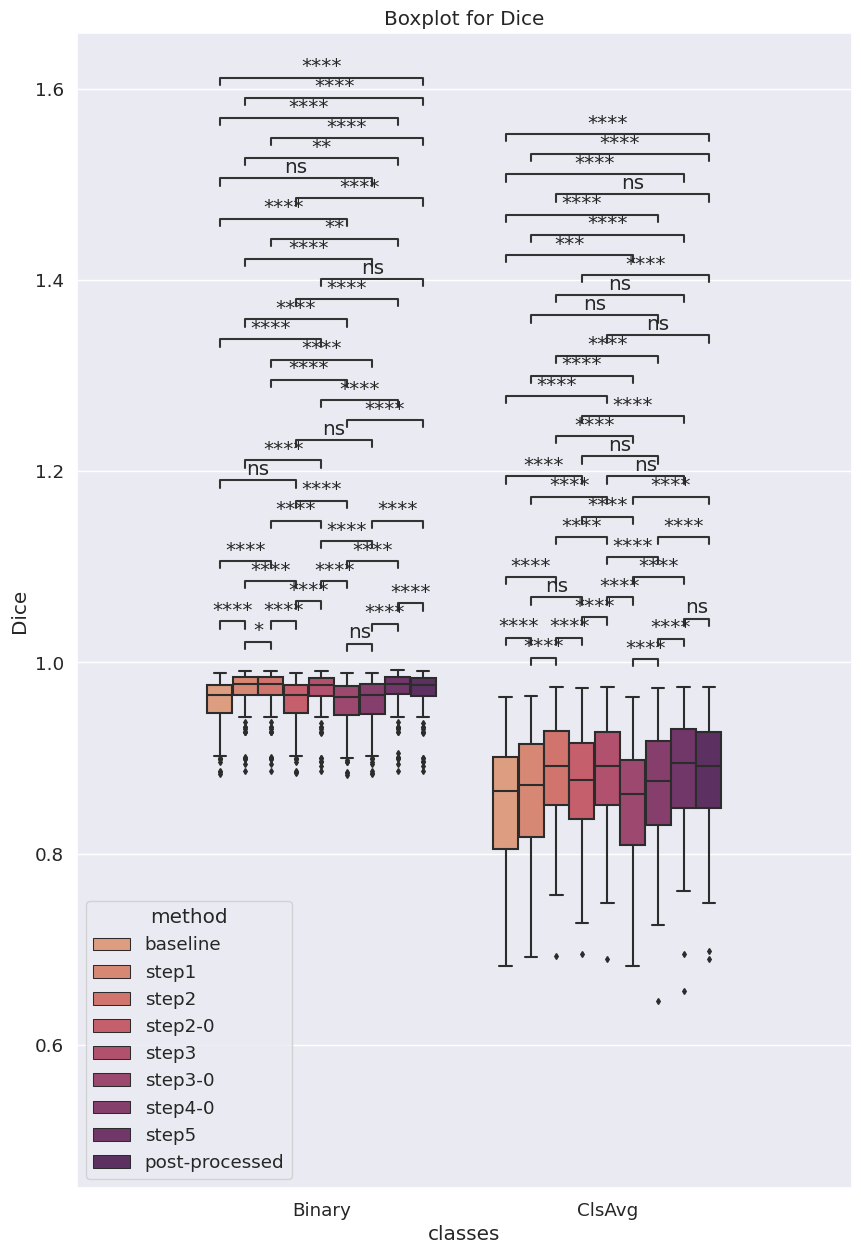

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ClsAvg_step1 vs. ClsAvg_step2: t-test paired samples, P_val:2.032e-14 t=8.667e+00
ClsAvg_step3-0 vs. ClsAvg_step4-0: t-test paired samples, P_val:8.805e-12 t=7.536e+00
ClsAvg_step4-0 vs. ClsAvg_step5: t-test paired samples, P_val:8.334e-01 t=2.108e-01
Binary_step3-0 vs. Binary_step4-0: t-test paired samples, P_val:7.155e-03 t=2.735e+00
Binary_step1 vs. Binary_step2: t-test paired samples, P_val:4.170e-06 t=4.817e+00
Binary_step2 vs. Binary_step2-0: t-test paired samples, P_val:6.551e-06 t=-4.709e+00
Binary_baseline vs. Binary_step1: t-test paired samples, P_val:9.437e-05 t=4.036e+00
Binary_step2-0 vs. Binary_step3: t-test paired samples, P_val:7.802e-07 t=5.205e+00
Binary_step3 vs. Binary_step3-0: t-test paired samples, P_val:1.699e-04 t=-3.878e+00
Binary_step4-0 vs. Binary_step5: t-test paired sa

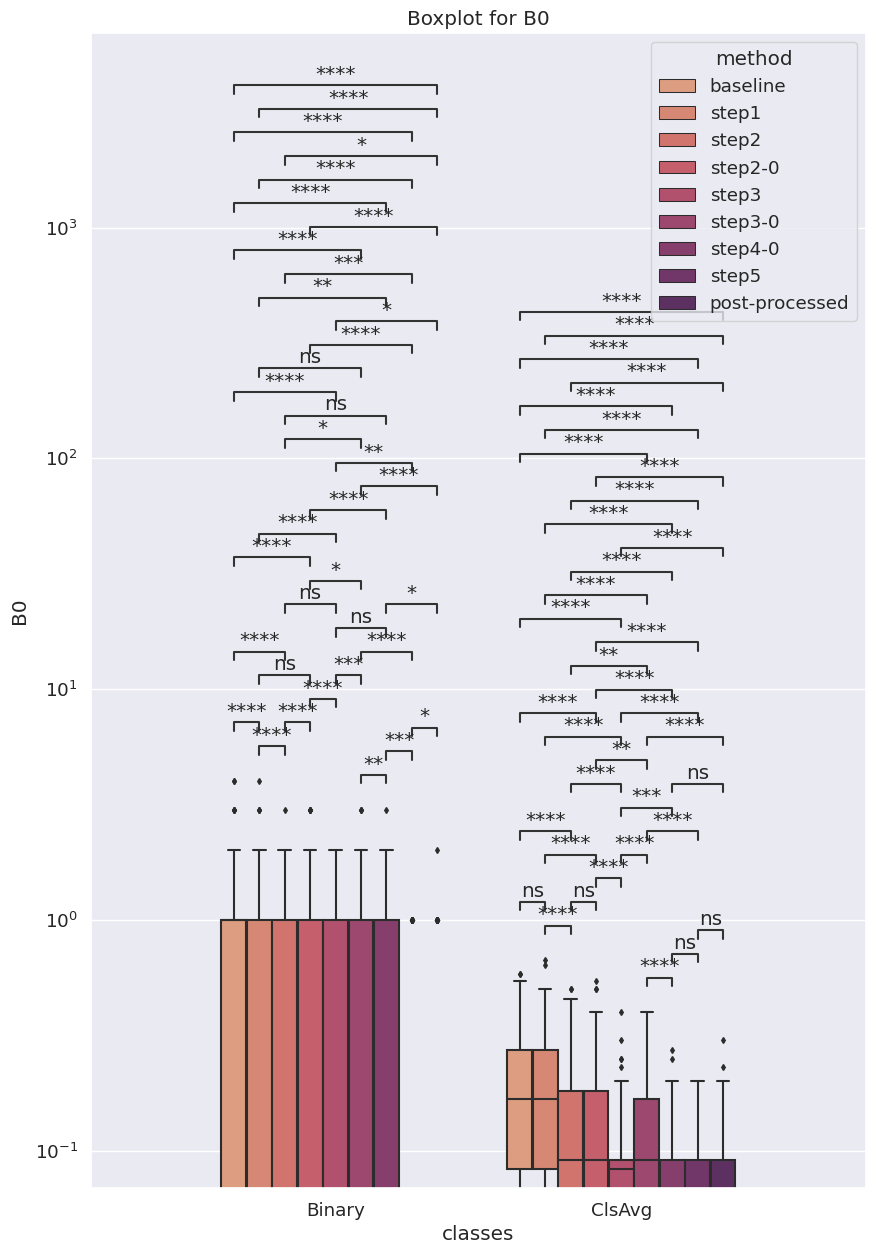

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ClsAvg_step1 vs. ClsAvg_step2: t-test paired samples, P_val:4.851e-07 t=5.312e+00
ClsAvg_step3-0 vs. ClsAvg_step4-0: t-test paired samples, P_val:4.453e-06 t=4.801e+00
ClsAvg_step4-0 vs. ClsAvg_step5: t-test paired samples, P_val:3.053e-02 t=2.188e+00
Binary_step3-0 vs. Binary_step4-0: t-test paired samples, P_val:3.744e-01 t=-8.914e-01
Binary_step1 vs. Binary_step2: t-test paired samples, P_val:3.193e-01 t=1.000e+00
Binary_step2 vs. Binary_step2-0: t-test paired samples, P_val:5.147e-09 t=-6.283e+00
Binary_baseline vs. Binary_step1: t-test paired samples, P_val:4.889e-09 t=6.293e+00
Binary_step2-0 vs. Binary_step3: t-test paired samples, P_val:3.864e-07 t=5.363e+00
Binary_step3 vs. Binary_step3-0: t-test paired samples, P_val:1.211e-07 t=-5.618e+00
Binary_step4-0 vs. Binary_step5: t-test paired s

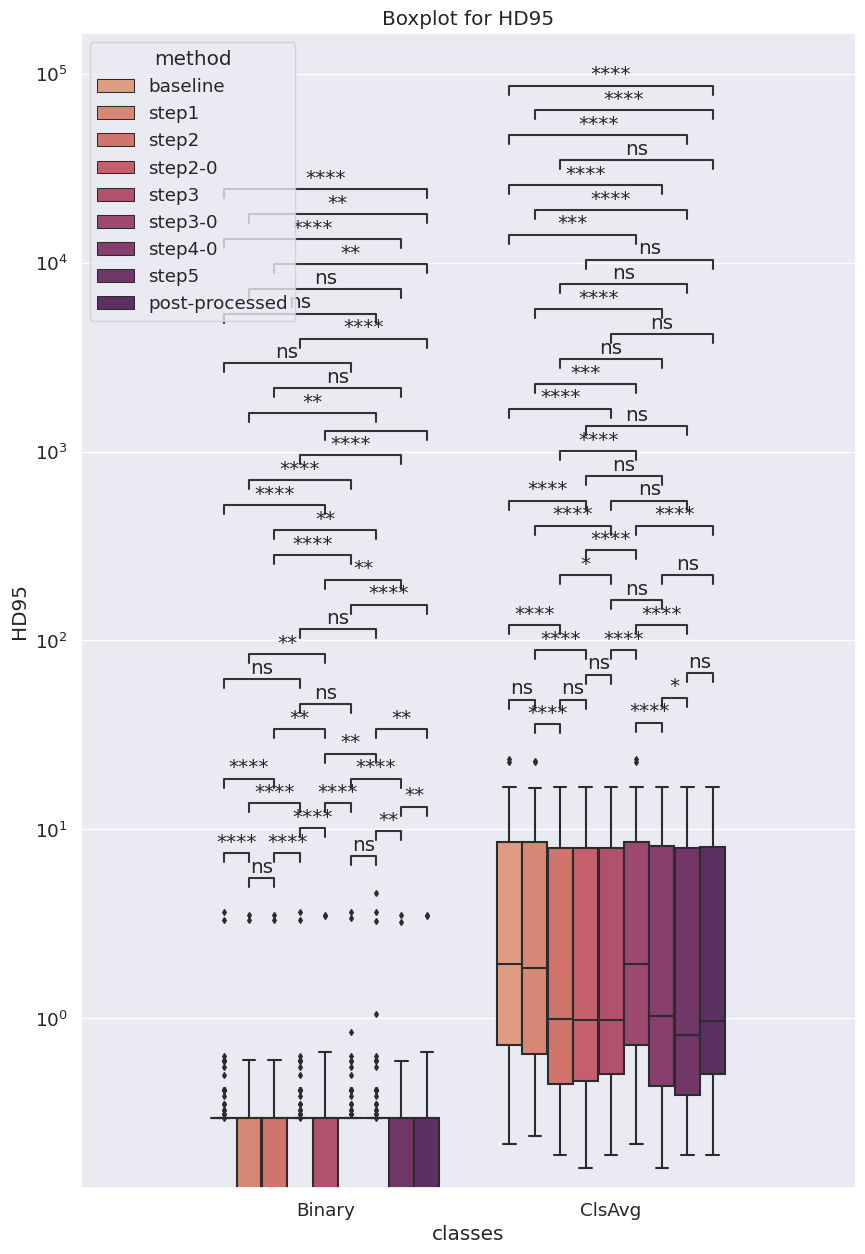

In [2]:
''' Get the boxplot with t-test for MRA using different post-processing steps '''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_ablation.tsv', sep='\t')
# desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
desired_classes = ['Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'baseline', 'with_pp': 'post-processed'})

stages = ['baseline', 'step1', 'step2-0', 'step3-0', 'step4-0', 'step2', 'step3', 'step5', 'post-processed']

# We want to create pairs for each class
pairs = []
for class_name in desired_classes:
    for i in range(len(stages)):
        for j in range(i + 1, len(stages)):  # Avoid duplicate and self-pairs
            pairs.append(((class_name, stages[i]), (class_name, stages[j])))


## Cleaning the NaN rows:
nan_rows = df_exps[df_exps['B0'].isna()]
subjects_classes_with_nan = nan_rows[['subjects', 'classes']].drop_duplicates()
df_cleaned = df_exps.copy()
for i, subb in enumerate(subjects_classes_with_nan.subjects):
    for classs in subjects_classes_with_nan[subjects_classes_with_nan['subjects'] == subb]['classes']:
        df_cleaned = df_cleaned[~((df_cleaned['subjects'] == subb) & (df_cleaned['classes'] == classs))]


df_cleaned.rename(columns={'status': 'method'}, inplace=True)

for met in ['Dice', 'B0', 'HD95']:
    hue_plot_params = {
        'data': df_cleaned,
        'x': 'classes',
        'y': met,
        "hue": "method",
        "palette": 'flare',  # 'flare' or 'crest'
        "width": 0.8, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(10,15)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    
    
    if not met == 'Dice':
        ax.set_yscale('log')  # FIXME:
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=1).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
    if met == 'Dice':
        ax.set_ylim(bottom=0.45)  # FIXME: For MRA
        # ax.set_ylim(bottom=0.25)  # FIXME: For CTA
        # ax.set_ylim(bottom=0.25)  # FIXME: For CROWN
    elif met == 'B0':
        pass  # FIXME: For MRA/CTA
    elif met == 'HD95':
        pass  # FIXME: For MRA
        # ax.set_ylim(bottom=0.1)  # FIXME: For CTA
        # ax.set_ylim(bottom=0.1)  # FIXME: For CROWN
    plt.title(f'Boxplot for {met}')
    plt.show()


##### Single t-test values

In [80]:
''' Single t-test value '''


import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    mra_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    mra_mul_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    mra_mul_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    cta_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    cta_mul_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    cta_mul_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_CTA-only_bin809_mul815_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    cta_mul_815 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CROWN-MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    crown_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    crown_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    crown_pp = json.load(file)

nround = 3

def extract_metric_data(metrics_with, metrics_without, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_without.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_without['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('without_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_with.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('with_pp')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})

# Extracting 'B0' and 'Dice' data for both 'with_pp' and 'without_pp'
met_df = extract_metric_data(crown_pp, crown_nopp, 'B0')  # HD95

from scipy.stats import ttest_rel
df = met_df[met_df['classes'] == 'ClsAvgB0']
status_1 = df[df['status'] == 'without_pp']['B0'].dropna()
status_2 = df[df['status'] == 'with_pp']['B0'].dropna()

# Ensure both status groups have the same length (i.e., they represent the same subjects)
if len(status_1) == len(status_2):
    t_stat, p_value = ttest_rel(status_1, status_2)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
else:
    print("The number of samples for each status group must be the same.")

# Dice: 0.003, B0: nan  , HD95: 2e-5  , clDice: 2e-8  , F1:  

T-statistic: nan
P-value: nan


#### Other ablation parts

In [ ]:
''' Ablation study - single or dual modality (Binary) '''
import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset810_TopCoWSegBinMRAnew.json', 'r') as file:
    bin_mra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset811_TopCoWSegBinMRACTA_MRA.json', 'r') as file:
    bin_mra_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset809_TopCoWSegBinCTA.json', 'r') as file:
    bin_cta = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset811_TopCoWSegBinMRACTA_CTA.json', 'r') as file:
    bin_cta_ctamra = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_binary_cta.json', 'r') as file:
#     bin_cta_ = json.load(file)



# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (only)', 'MRA (both)', 'CTA (only)', 'CTA (both)']  # 'CTA_'
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics:
    table_data[metric] = [
        f"{round(bin_mra['aggregates'][metric]['mean'], 3)} ± {round(bin_mra['aggregates'][metric]['std'], 3)}",
        f"{round(bin_mra_ctamra['aggregates'][metric]['mean'], 3)} ± {round(bin_mra_ctamra['aggregates'][metric]['std'], 3)}",
        f"{round(bin_cta['aggregates'][metric]['mean'], 3)} ± {round(bin_cta['aggregates'][metric]['std'], 3)}",
        f"{round(bin_cta_ctamra['aggregates'][metric]['mean'], 3)} ± {round(bin_cta_ctamra['aggregates'][metric]['std'], 3)}",
        # f"{round(bin_cta_['aggregates'][metric]['mean'], 3)} ± {round(bin_cta_['aggregates'][metric]['std'], 3)}",
    ]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95
0,MRA (only),0.957 ± 0.025,0.977 ± 0.019,1.256 ± 1.231,0.373 ± 0.487
1,MRA (both),0.951 ± 0.026,0.98 ± 0.019,0.912 ± 1.115,0.406 ± 0.49
2,CTA (only),0.915 ± 0.043,0.978 ± 0.027,0.832 ± 0.973,0.728 ± 1.143
3,CTA (both),0.911 ± 0.041,0.973 ± 0.026,1.032 ± 1.077,0.726 ± 0.82


In [ ]:
''' Ablation study - single or dual modality (Multiclass) '''

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_mra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_MRA.json', 'r') as file:
    mul_mra_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset815_TopCoWSegCTA.json', 'r') as file:
    mul_cta = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_CTA.json', 'r') as file:
    mul_cta_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_cta_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    mul_cta_ = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (only)', 'MRA (both)', 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_mra['aggregates'][metric]['mean'], nround)} ± {round(mul_mra['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_ctamra['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta['aggregates'][metric]['mean'], nround)} ± {round(mul_cta['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_ctamra['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_mra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_['aggregates']['dect_avg']['f1_score']['std'], nround)}",

]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (only),0.791 ± 0.068,0.966 ± 0.022,0.422 ± 0.268,12.286 ± 6.198,0.428 ± 0.204
1,MRA (both),0.811 ± 0.076,0.978 ± 0.023,0.266 ± 0.191,8.713 ± 7.065,0.641 ± 0.121
2,CTA (only),0.782 ± 0.082,0.966 ± 0.032,0.269 ± 0.183,8.873 ± 6.888,0.572 ± 0.233
3,CTA (both),0.775 ± 0.079,0.965 ± 0.036,0.336 ± 0.225,9.383 ± 7.193,0.618 ± 0.176
4,CTA_,0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.21,6.987 ± 6.088,0.72 ± 0.167


In [ ]:
''' Ablation study - single or dual modality (Multiclass + post-processing) '''

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_CTA_D815-all_D809.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_cta_default = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_CTA_D816-all_D809.json', 'r') as file:
    mul_cta_default_skeleton = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_all-losses.json', 'r') as file:
#     mul_mra_all = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset816_TopCoWSegMRACTA_CTA.json', 'r') as file:
    mul_cta_ctamra = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset815_TopCoWSegCTA.json', 'r') as file:
    mul_cta = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['CTA (only)', 'CTA (both)', 'CTA (only no pp)', 'CTA (both no pp)']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_cta_default['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_default['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_default_skeleton['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_default_skeleton['aggregates'][metric]['std'], nround)}",
        # f"{round(mul_mra_all['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta['aggregates'][metric]['mean'], nround)} ± {round(mul_cta['aggregates'][metric]['std'], nround)}",
        f"{round(mul_cta_ctamra['aggregates'][metric]['mean'], nround)} ± {round(mul_cta_ctamra['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_cta_default['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_default['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_default_skeleton['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_default_skeleton['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    # f"{round(mul_mra_all['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_cta_ctamra['aggregates']['dect_avg']['f1_score']['std'], nround)}",

]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,CTA (only),0.793 ± 0.088,0.972 ± 0.029,0.095 ± 0.09,7.997 ± 7.273,0.634 ± 0.24
1,CTA (both),0.795 ± 0.095,0.971 ± 0.031,0.092 ± 0.103,7.751 ± 8.5,0.695 ± 0.155
2,CTA (only no pp),0.782 ± 0.082,0.966 ± 0.032,0.269 ± 0.183,8.873 ± 6.888,0.572 ± 0.233
3,CTA (both no pp),0.775 ± 0.079,0.965 ± 0.036,0.336 ± 0.225,9.383 ± 7.193,0.618 ± 0.176


In [ ]:
''' Ablation study - loss functions (MRA) '''

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_default.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_mra_default = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_default-skeleton.json', 'r') as file:
    mul_mra_default_skeleton = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation_Dataset818_TopCoWSegMRAablation_all-losses.json', 'r') as file:
    mul_mra_all = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-default_D810.json', 'r') as file:  #metrics_ablation_Dataset818_TopCoWSegMRAablation  metrics_mra_skr_bindice_nomir_5folds_without_pp
    mul_mra_default_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-def-skel_D810.json', 'r') as file:
    mul_mra_default_skeleton_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_ablation-pp_MRA_D818-def-skel-bin_D810.json', 'r') as file:
    mul_mra_all_pp = json.load(file)


nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (default)', 'MRA (default+skel)', 'MRA (all)', 'MRA pp (default)', 'MRA pp (default+skel)', 'MRA pp (all)']  #, 'CTA (only)', 'CTA (both)', 'CTA_']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mul_mra_default['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_default_skeleton['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default_skeleton['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_all['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_default_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default_pp['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_default_skeleton_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_default_skeleton_pp['aggregates'][metric]['std'], nround)}",
        f"{round(mul_mra_all_pp['aggregates'][metric]['mean'], nround)} ± {round(mul_mra_all_pp['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mul_mra_default['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_default_skeleton['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default_skeleton['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_all['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_default_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_default_skeleton_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_default_skeleton_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mul_mra_all_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mul_mra_all_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    
]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (default),0.826 ± 0.075,0.978 ± 0.019,0.305 ± 0.233,7.246 ± 6.381,0.733 ± 0.092
1,MRA (default+skel),0.798 ± 0.102,0.978 ± 0.019,0.404 ± 0.246,9.483 ± 6.981,0.692 ± 0.127
2,MRA (all),0.81 ± 0.066,0.977 ± 0.019,0.367 ± 0.309,10.253 ± 5.762,0.578 ± 0.194
3,MRA pp (default),0.84 ± 0.072,0.973 ± 0.022,0.094 ± 0.085,5.862 ± 5.887,0.797 ± 0.069
4,MRA pp (default+skel),0.816 ± 0.105,0.97 ± 0.024,0.109 ± 0.093,7.444 ± 6.988,0.743 ± 0.095
5,MRA pp (all),0.81 ± 0.074,0.974 ± 0.021,0.135 ± 0.097,9.761 ± 6.537,0.586 ± 0.239


In [ ]:
## Boxplots for Final MRA with t-test:
### FINAL VERSION for Paper

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_ablation.tsv', sep='\t')
# desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
desired_classes = ['ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'baseline', 'with_pp': 'post-processed'})

# We want to create pairs for each class
# pairs = []
# for class_name in desired_classes: #df_exps['classes'].unique():    
#     pairs.append(((class_name, 'baseline'), (class_name, 'post-processed')))
# stages = ['baseline', 'step1', 'step2', 'step2-0', 'step3', 'step3-0', 'step4-0', 'step5', 'post-processed']
stages = ['baseline', 'step1', 'step2-0', 'step3-0', 'step4-0', 'step2', 'step3', 'step5', 'post-processed']
# stages = ['baseline', 'step1', 'step2-0', 'step3-0', 'step4-0', 'post-processed']
pairs = []

for class_name in desired_classes:
    for i in range(len(stages)):
        for j in range(i + 1, len(stages)):  # Avoid duplicate and self-pairs
            pairs.append(((class_name, stages[i]), (class_name, stages[j])))


## Cleaning the NaN rows:
nan_rows = df_exps[df_exps['B0'].isna()]
subjects_classes_with_nan = nan_rows[['subjects', 'classes']].drop_duplicates()
df_cleaned = df_exps.copy()
for i, subb in enumerate(subjects_classes_with_nan.subjects):
    for classs in subjects_classes_with_nan[subjects_classes_with_nan['subjects'] == subb]['classes']:
        df_cleaned = df_cleaned[~((df_cleaned['subjects'] == subb) & (df_cleaned['classes'] == classs))]


df_cleaned.rename(columns={'status': 'method'}, inplace=True)

for met in ['Dice', 'B0', 'HD95', 'clDice']:
    hue_plot_params = {
        'data': df_cleaned,
        'x': 'classes',
        'y': met,
        "hue": "method",
        "palette": 'flare',  # 'flare' or 'crest'
        "width": 0.8, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(10,15)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    
    
    if not met == 'Dice':
        ax.set_yscale('log')  # FIXME:
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=1).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
    if met == 'Dice':
        # ax.set_ylim(bottom=0.45)  # FIXME: For MRA
        # ax.set_ylim(bottom=0.25)  # FIXME: For CTA
        ax.set_ylim(bottom=0.25)  # FIXME: For CROWN
    elif met == 'B0':
        pass  # FIXME: For MRA/CTA
    elif met == 'HD95':
        #pass  # FIXME: For MRA
        # ax.set_ylim(bottom=0.1)  # FIXME: For CTA
        ax.set_ylim(bottom=0.1)  # FIXME: For CROWN
    # ax.legend(loc=(1.0, 0.88))
    # ax.legend(loc="lower right")  #, markerscale=1, fontsize=10)  # Example to position it to the right outside
    plt.title(f'Boxplot for {met}')
    plt.show()


In [ ]:
## Boxplots for Final CTA:
### FINAL VERSION for Paper

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

# with open('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
#     metrics_without_pp = json.load(file)
# with open('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
#     metrics_with_pp = json.load(file)

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step1.json', 'r') as file:
    metrics_step1 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step2.json', 'r') as file:
    metrics_step2 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step2-0.json', 'r') as file:
    metrics_step2_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step3.json', 'r') as file:
    metrics_step3 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step3-0.json', 'r') as file:
    metrics_step3_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step4-0.json', 'r') as file:
    metrics_step4_0 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_step5.json', 'r') as file:
    metrics_step5 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)
    
def extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_without_pp.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_without_pp['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('without_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step1.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step1['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step1')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_step2.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step2['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step2')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step2_0.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step2_0['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step2-0')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_step3.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step3['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step3')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step3_0.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step3_0['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step3-0')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_step4_0.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step4_0['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step4-0')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_step5.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_step5['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('step5')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    # Extract 'without_pp' data
    for met in metrics_with_pp.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with_pp['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('with_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    
    
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})

# Extracting 'B0' and 'Dice' data for both 'with_pp' and 'without_pp'
B0_df = extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, 'B0')
Dice_df = extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, 'Dice')  # Extract Dice data from 'metrics_with_pp'
HD95_df = extract_metric_data(metrics_without_pp, metrics_step1, metrics_step2, metrics_step2_0, metrics_step3, metrics_step3_0, metrics_step4_0, metrics_step5, metrics_with_pp, 'HD95')  # Adjust if you want 'without_pp' here
# clDice_df = extract_metric_data(metrics_with_pp, metrics_with_pp, 'clDice')  # Uncomment if needed

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
# # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_ablation.tsv', sep='\t')
merged_df

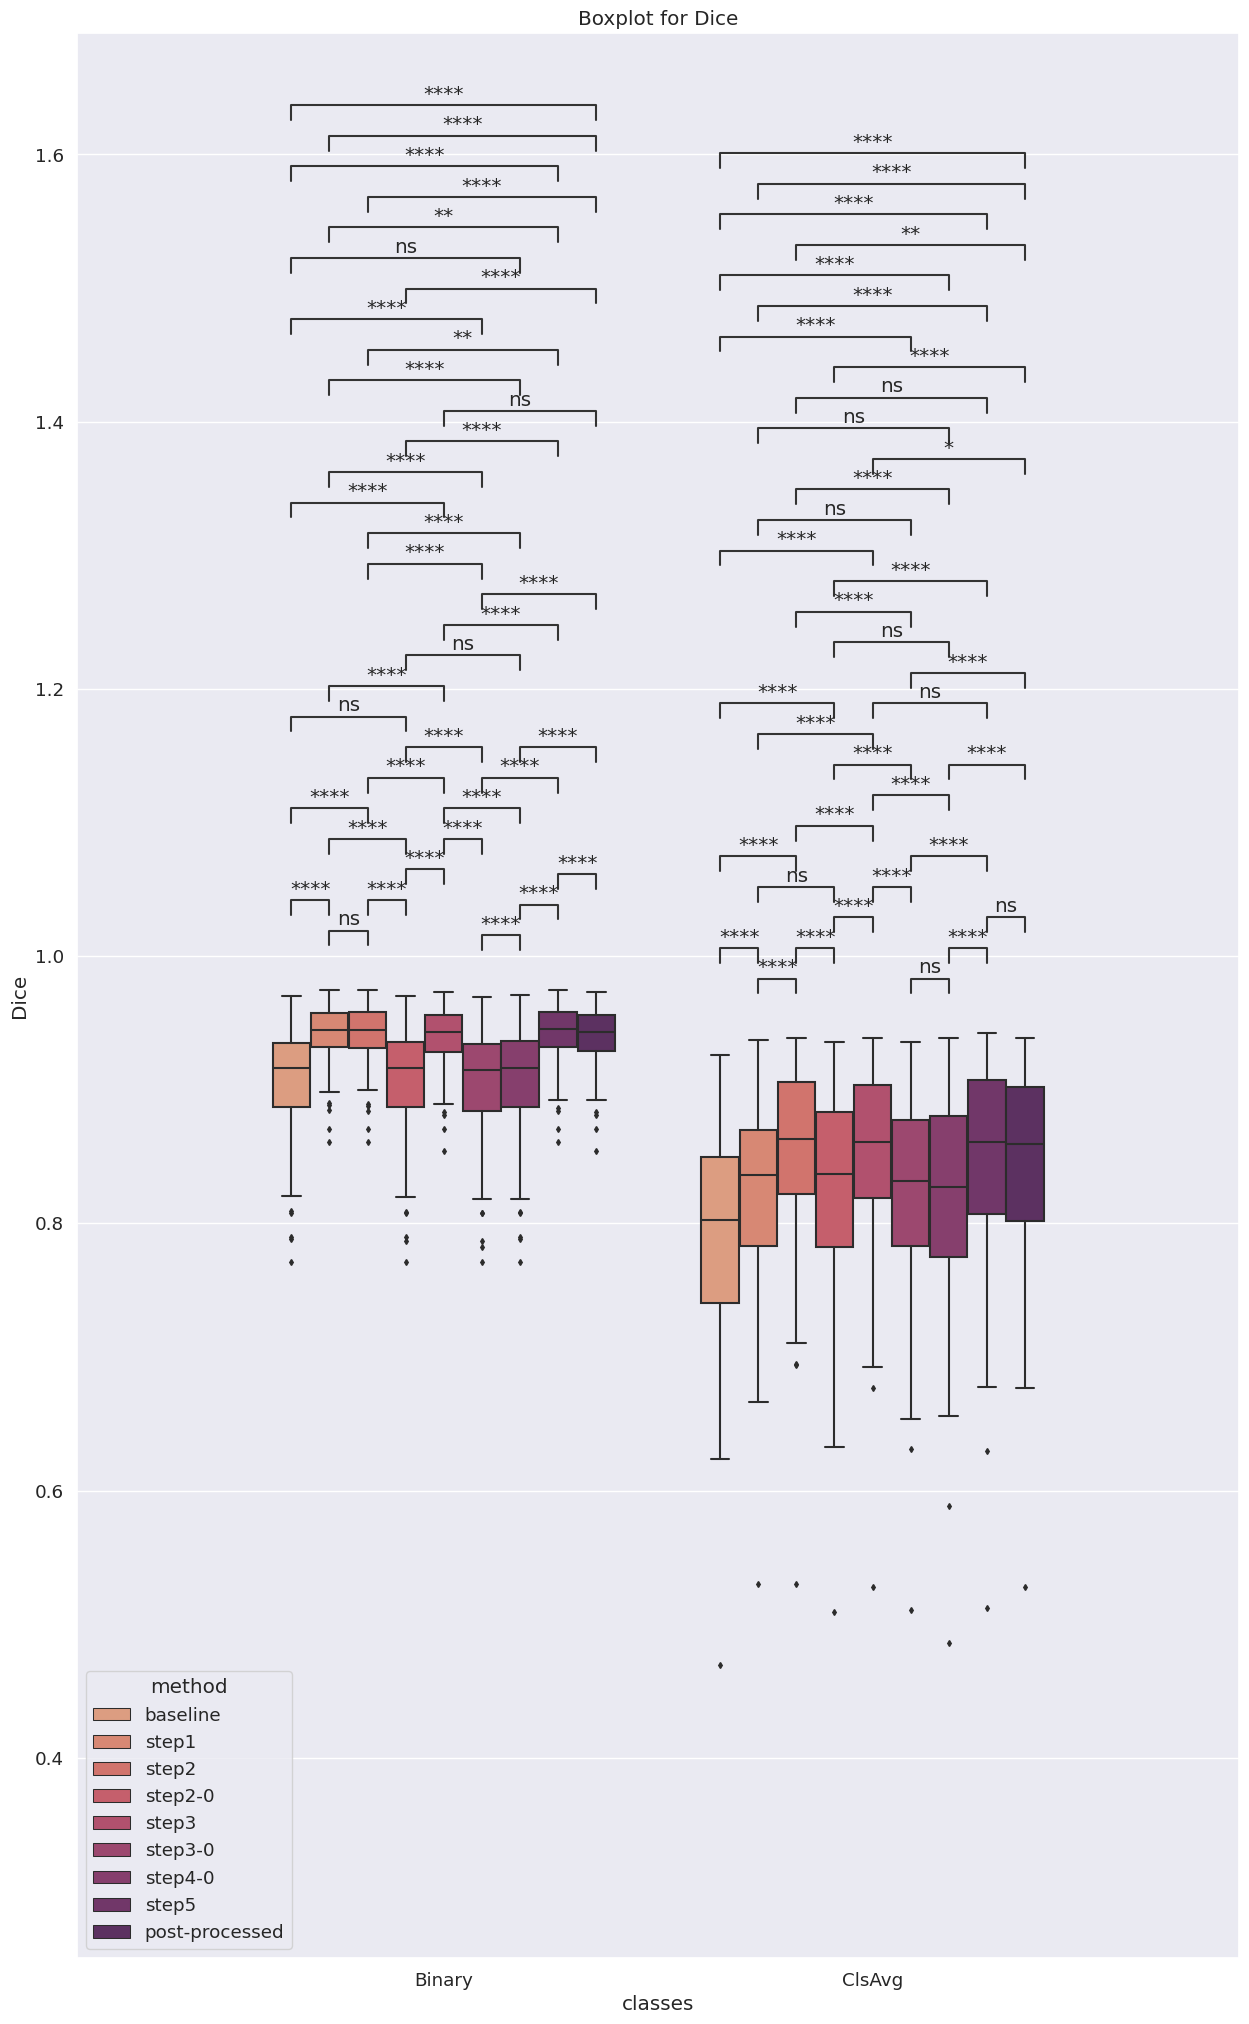

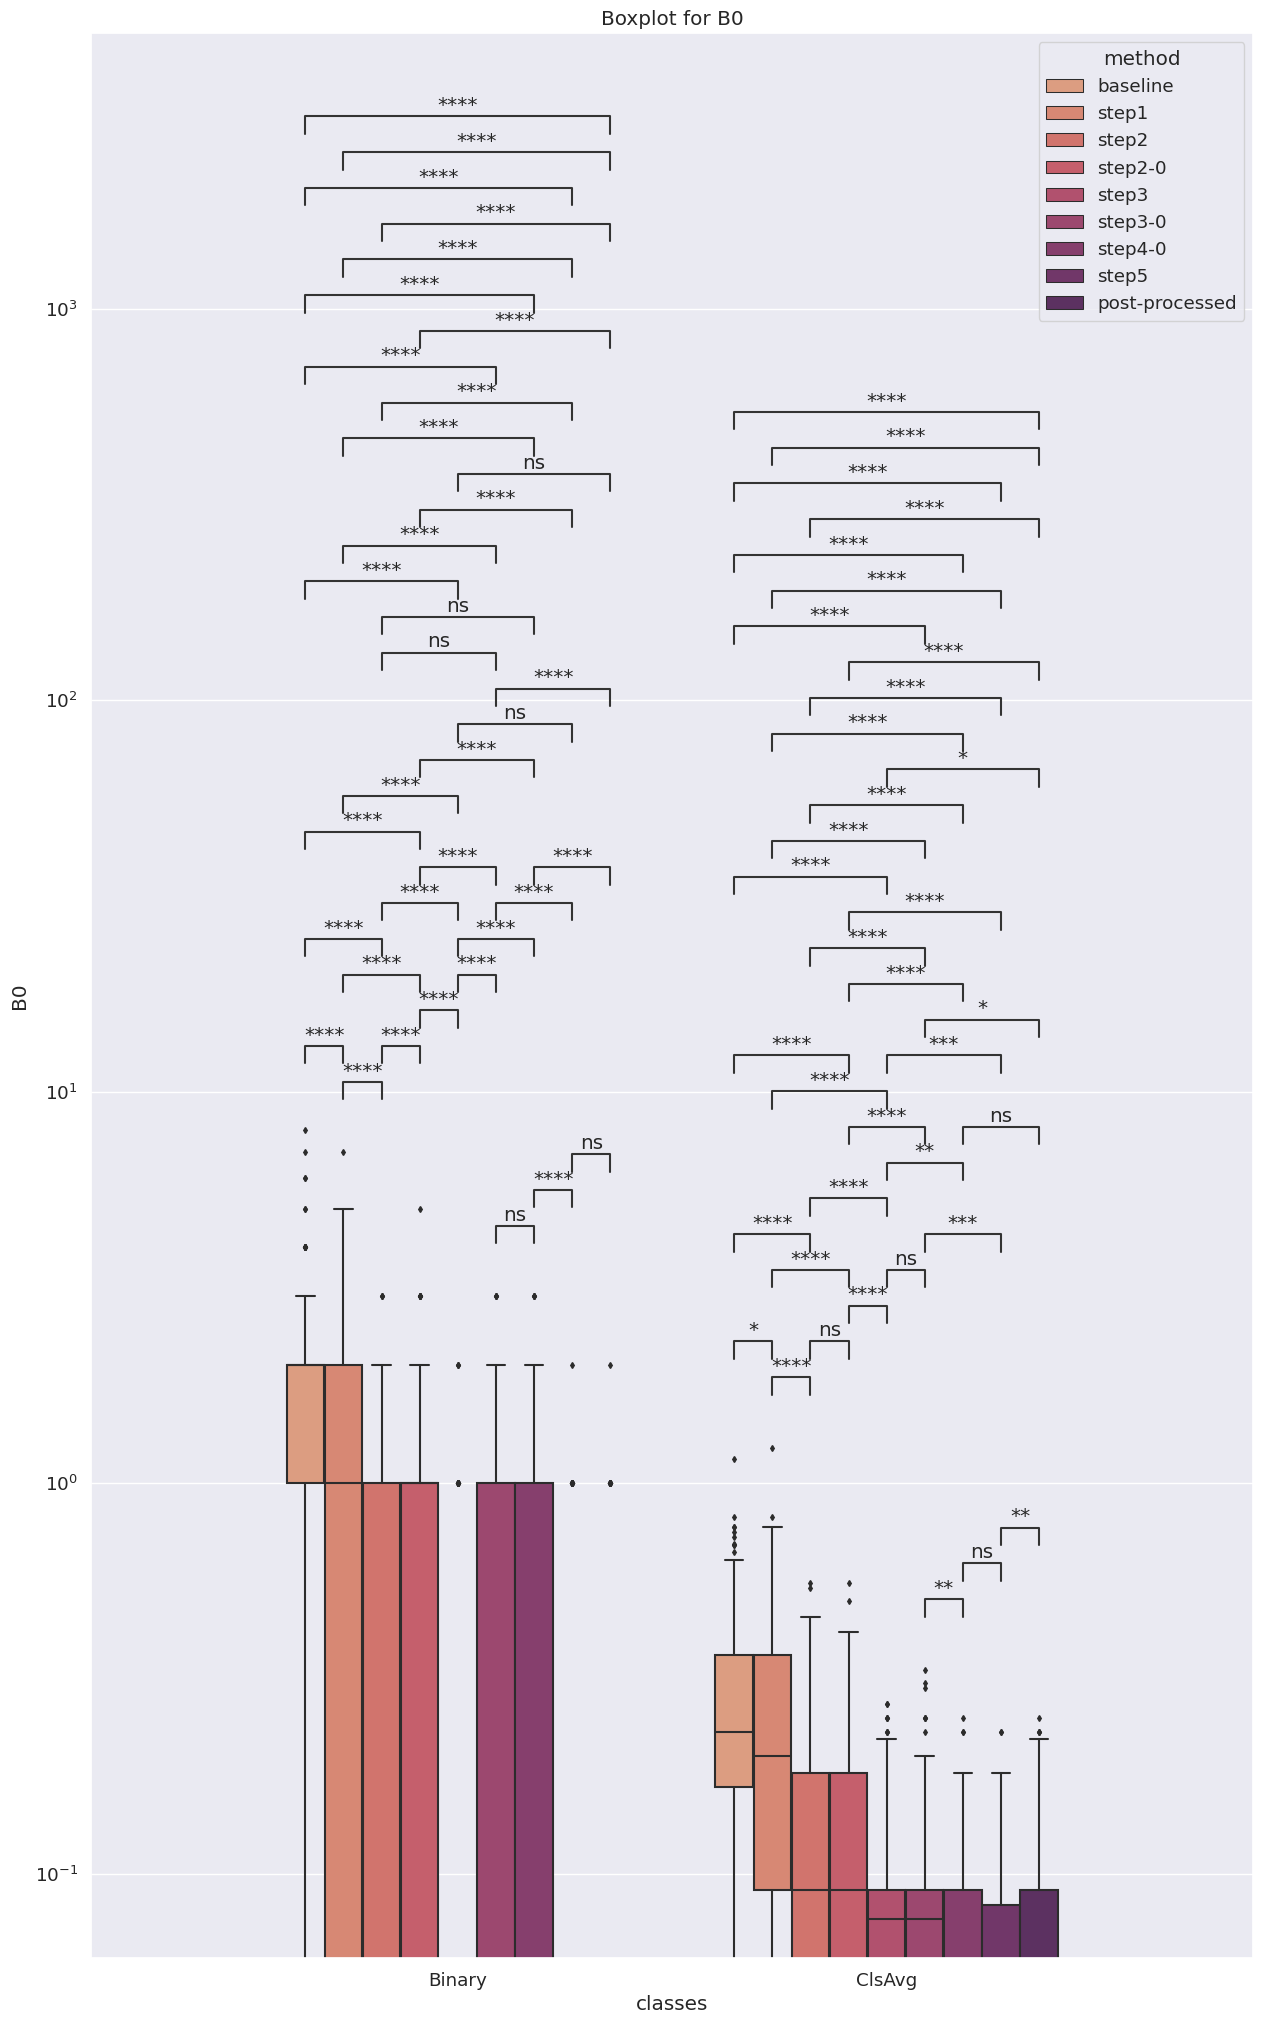

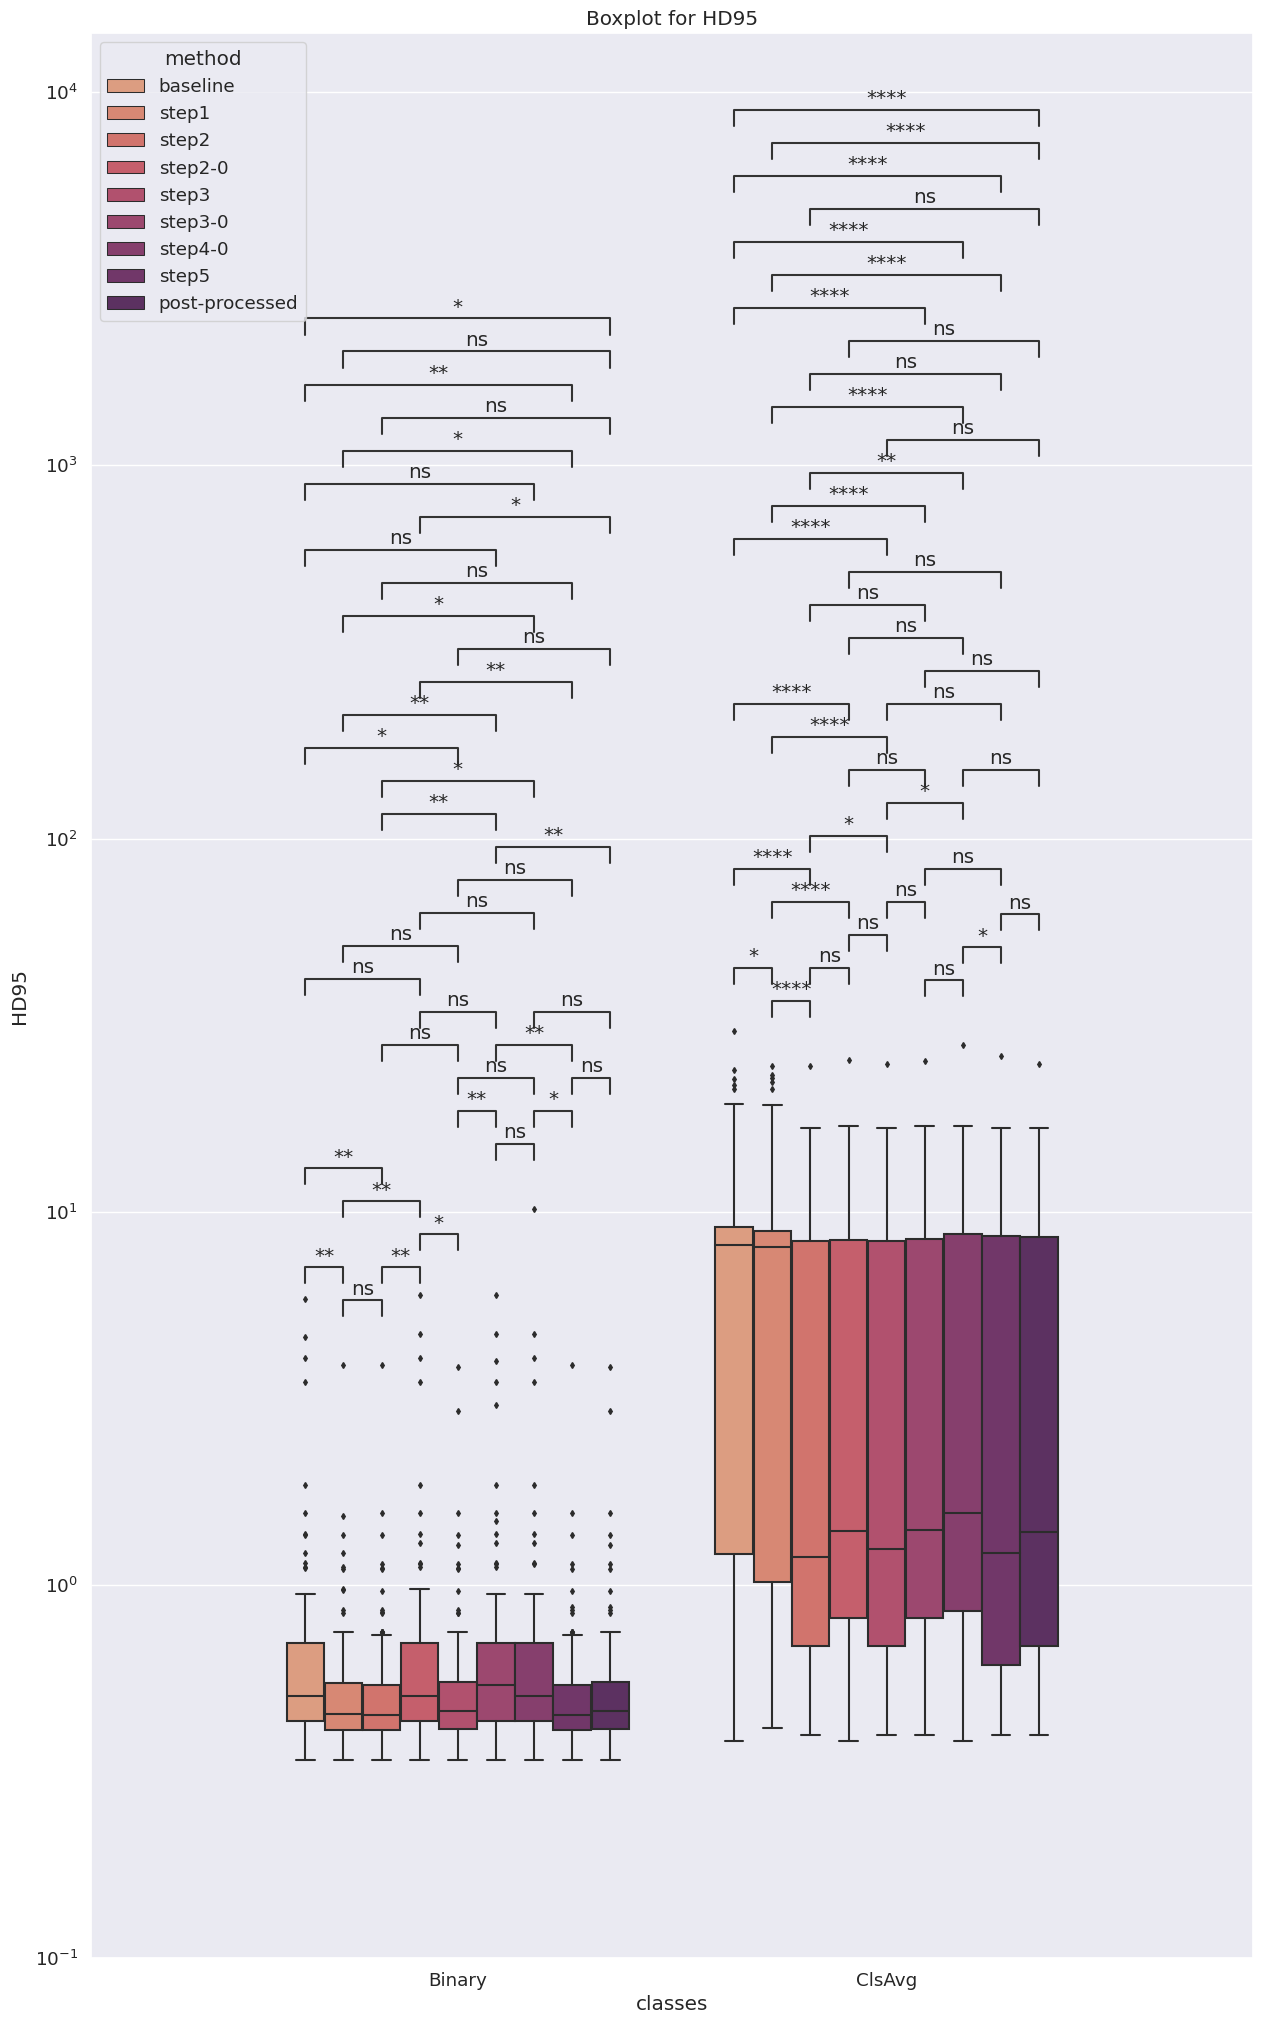

In [2]:
## Boxplots for Final CTA with t-test:
### FINAL VERSION for Paper

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best.tsv', sep='\t')  # MRA
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best.tsv', sep='\t')  # CTA
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()  # CROWN

df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_ablation.tsv', sep='\t')
# desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
desired_classes = ['Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'baseline', 'with_pp': 'post-processed'})

# We want to create pairs for each class
# pairs = []
# for class_name in desired_classes: #df_exps['classes'].unique():    
#     pairs.append(((class_name, 'baseline'), (class_name, 'post-processed')))
stages = ['baseline', 'step1', 'step2', 'step2-0', 'step3', 'step3-0', 'step4-0', 'step5', 'post-processed']
# stages = ['baseline', 'step1', 'step2-0', 'step3-0', 'step4-0', 'post-processed']
pairs = []

for class_name in desired_classes:
    for i in range(len(stages)):
        for j in range(i + 1, len(stages)):  # Avoid duplicate and self-pairs
            pairs.append(((class_name, stages[i]), (class_name, stages[j])))


## Cleaning the NaN rows:
nan_rows = df_exps[df_exps['B0'].isna()]
subjects_classes_with_nan = nan_rows[['subjects', 'classes']].drop_duplicates()
df_cleaned = df_exps.copy()
for i, subb in enumerate(subjects_classes_with_nan.subjects):
    for classs in subjects_classes_with_nan[subjects_classes_with_nan['subjects'] == subb]['classes']:
        df_cleaned = df_cleaned[~((df_cleaned['subjects'] == subb) & (df_cleaned['classes'] == classs))]


df_cleaned.rename(columns={'status': 'method'}, inplace=True)

for met in ['Dice', 'B0', 'HD95']:
    hue_plot_params = {
        'data': df_cleaned,
        'x': 'classes',
        'y': met,
        "hue": "method",
        "palette": 'flare',  # 'flare' or 'crest'
        "width": 0.8, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(15,25)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    
    
    if not met == 'Dice':
        ax.set_yscale('log')  # FIXME:
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
    if met == 'Dice':
        # ax.set_ylim(bottom=0.45)  # FIXME: For MRA
        # ax.set_ylim(bottom=0.25)  # FIXME: For CTA
        ax.set_ylim(bottom=0.25)  # FIXME: For CROWN
    elif met == 'B0':
        pass  # FIXME: For MRA/CTA
    elif met == 'HD95':
        #pass  # FIXME: For MRA
        # ax.set_ylim(bottom=0.1)  # FIXME: For CTA
        ax.set_ylim(bottom=0.1)  # FIXME: For CROWN
    # ax.legend(loc=(1.0, 0.88))
    # ax.legend(loc="lower right")  #, markerscale=1, fontsize=10)  # Example to position it to the right outside
    plt.title(f'Boxplot for {met}')
    plt.show()


In [27]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

def extract_metric_data(metrics_with, method_name, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_with.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append(method_name)
                classes.append(met.split('_')[-1])
                values.append(val)
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})



# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
method_names = ['without_pp', 'step1', 'step2', 'step2-0', 'step3', 'step3-0', 'step4-0', 'step_5', 'with_pp']

list_file_paths = ['/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_without_pp.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step1_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step2-0_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step3-0_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step4-0_mra.json',
                   '/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_step5_mra.json',
                   '/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_with_pp.json'
                   ]

B0_df = pd.DataFrame()
Dice_df = pd.DataFrame()
HD95_df = pd.DataFrame()

for i, file_path in enumerate(list_file_paths):
    with open(file_path, 'r') as file:
        metrics_data = json.load(file)

    data = extract_metric_data(metrics_data, method_names[i], 'B0')
    B0_df = pd.concat([B0_df, data])
    data = extract_metric_data(metrics_data, method_names[i], 'Dice')
    Dice_df = pd.concat([Dice_df, data])
    data = extract_metric_data(metrics_data, method_names[i], 'HD95')
    HD95_df = pd.concat([HD95_df, data])

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
# # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/metrics_mra_skr_bindice_nomir_5folds_tmp_todeletee.tsv', sep='\t')
merged_df

,subjects,classes,status,B0,Dice,HD95
0,sub_1,3rd-A2,without_pp,NaN,NaN,NaN
1,sub_2,3rd-A2,without_pp,NaN,NaN,NaN
2,sub_3,3rd-A2,without_pp,NaN,NaN,NaN
3,sub_4,3rd-A2,without_pp,2.0,0.000000,90.000000
4,sub_5,3rd-A2,without_pp,NaN,NaN,NaN
...,...,...,...,...,...,...
1870,sub_121,R-Pcom,with_pp,0.0,0.938542,0.296875
1871,sub_122,R-Pcom,with_pp,NaN,NaN,NaN
1872,sub_123,R-Pcom,with_pp,0.0,0.959589,0.296875
1873,sub_124,R-Pcom,with_pp,NaN,NaN,NaN


### Visualization

#### Tables

In [4]:
''' Get metrics in a table for all modalities (cross-val + Crown)'''

import json
import pandas as pd

with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    mra_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    mra_mul_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    mra_mul_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    cta_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    cta_mul_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    cta_mul_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_CTA-only_bin809_mul815_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    cta_mul_815 = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CROWN-MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_bin.json', 'r') as file:
    crown_bin = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
    crown_nopp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
    crown_pp = json.load(file)
nround = 3

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95', 'F1_score']

# Prepare data for the table
table_data = {
    'Metric': ['MRA (bin)', 'MRA (no-pp)', 'MRA (pp)', 'CTA (bin)', 'CTA (no-pp)', 'CTA (pp)', 'CTA only (815 no-pp)', 'crown (bin)', 'crown (no/pp)', 'crown (pp)']
}

# Collect the mean and std for each metric and format as 'mean ± std'
for metric in metrics[:-1]:
    table_data[metric] = [
        f"{round(mra_bin['aggregates'][metric]['mean'], nround)} ± {round(mra_bin['aggregates'][metric]['std'], nround)}",
        f"{round(mra_mul_nopp['aggregates'][metric]['mean'], nround)} ± {round(mra_mul_nopp['aggregates'][metric]['std'], nround)}",
        f"{round(mra_mul_pp['aggregates'][metric]['mean'], nround)} ± {round(mra_mul_pp['aggregates'][metric]['std'], nround)}",
        f"{round(cta_bin['aggregates'][metric]['mean'], nround)} ± {round(cta_bin['aggregates'][metric]['std'], nround)}",
        f"{round(cta_mul_nopp['aggregates'][metric]['mean'], nround)} ± {round(cta_mul_nopp['aggregates'][metric]['std'], nround)}",
        f"{round(cta_mul_pp['aggregates'][metric]['mean'], nround)} ± {round(cta_mul_pp['aggregates'][metric]['std'], nround)}",
        f"{round(cta_mul_815['aggregates'][metric]['mean'], nround)} ± {round(cta_mul_815['aggregates'][metric]['std'], nround)}",
        f"{round(crown_bin['aggregates'][metric]['mean'], nround)} ± {round(crown_bin['aggregates'][metric]['std'], nround)}",
        f"{round(crown_nopp['aggregates'][metric]['mean'], nround)} ± {round(crown_nopp['aggregates'][metric]['std'], nround)}",
        f"{round(crown_pp['aggregates'][metric]['mean'], nround)} ± {round(crown_pp['aggregates'][metric]['std'], nround)}",
    ]
table_data['F1_score'] = [
    f"{round(mra_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mra_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mra_mul_nopp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mra_mul_nopp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(mra_mul_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(mra_mul_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_mul_nopp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_mul_nopp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_mul_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_mul_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(cta_mul_815['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(cta_mul_815['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(crown_bin['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(crown_bin['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(crown_nopp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(crown_nopp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
    f"{round(crown_pp['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(crown_pp['aggregates']['dect_avg']['f1_score']['std'], nround)}",
]
df = pd.DataFrame(table_data)

df

,Metric,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,F1_score
0,MRA (bin),0.982 ± 0.008,0.995 ± 0.007,0.288 ± 0.579,0.149 ± 0.153,0.0 ± 0.0
1,MRA (no-pp),0.854 ± 0.065,0.986 ± 0.016,0.189 ± 0.153,5.141 ± 5.181,0.793 ± 0.091
2,MRA (pp),0.882 ± 0.057,0.989 ± 0.013,0.048 ± 0.063,3.401 ± 4.206,0.861 ± 0.075
3,CTA (bin),0.952 ± 0.016,0.995 ± 0.008,0.2 ± 0.524,0.4 ± 0.148,0.0 ± 0.0
4,CTA (no-pp),0.793 ± 0.077,0.974 ± 0.026,0.275 ± 0.209,6.987 ± 6.088,0.72 ± 0.167
5,CTA (pp),0.849 ± 0.067,0.984 ± 0.016,0.054 ± 0.064,4.214 ± 4.614,0.842 ± 0.104
6,CTA only (815 no-pp),0.771 ± 0.084,0.96 ± 0.035,0.247 ± 0.177,10.638 ± 7.521,0.439 ± 0.258
7,crown (bin),0.925 ± 0.039,0.969 ± 0.027,0.85 ± 0.587,0.624 ± 0.663,0.0 ± 0.0
8,crown (no/pp),0.805 ± 0.096,0.962 ± 0.051,0.253 ± 0.264,5.63 ± 6.093,0.786 ± 0.07
9,crown (pp),0.803 ± 0.079,0.961 ± 0.033,0.118 ± 0.101,5.699 ± 6.259,0.795 ± 0.075


#### Ranking from submission

In [58]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)

import os
import json
import pandas as pd
from natsort import natsorted

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
sub_metrics = ['dect_avg', 'topo_var_bal_acc_ant', 'topo_var_bal_acc_post', 'graph_var_bal_acc_ant', 'graph_var_bal_acc_post']  #f1_score

main_dir = '/home/hasna/miccai24_challenges/topcow_challenge_final/metrics/cta_phase'  #test_phase
df = pd.DataFrame()
nround = 3
for f in natsorted(os.listdir(main_dir)):
    # if not f.startswith('ours'):
        with open(os.path.join(main_dir, f), 'r') as file:
            rank_x = json.load(file)


        # Prepare data for the table
        table_data = {
            'Rank': [f.split('.')[0]]
        }

        # Collect the mean and std for each metric and format as 'mean ± std'
        for metric in metrics:
            table_data[metric] = [
                f"{round(rank_x['aggregates'][metric]['mean'], nround)} ± {round(rank_x['aggregates'][metric]['std'], nround)}"
            ]
        table_data['f1_score'] = [f"{round(rank_x['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(rank_x['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
        table_data['graph_acc_ant'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['anterior'], nround)}"]
        table_data['graph_acc_post'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['posterior'], nround)}"]
        table_data['topo_acc_ant'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['anterior'], nround)}"]
        table_data['topo_acc_post'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['posterior'], nround)}"]
        

        # Convert the dictionary into a DataFrame
        df = pd.concat([df, pd.DataFrame(table_data)])

df

,Rank,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score,graph_acc_ant,graph_acc_post,topo_acc_ant,topo_acc_post
0,1st,0.874 ± 0.059,0.986 ± 0.024,0.036 ± 0.054,3.223 ± 4.252,0.858 ± 0.053,0.874,0.681,0.79,0.577
0,2nd,0.849 ± 0.056,0.99 ± 0.012,0.063 ± 0.087,3.034 ± 3.874,0.831 ± 0.096,0.791,0.836,0.561,0.7
0,ours,0.88 ± 0.06,0.989 ± 0.014,0.042 ± 0.06,3.449 ± 4.428,0.75 ± 0.27,0.777,0.747,0.656,0.63


In [3]:
## Between current 2 folds and submitted 2 folds (somehow 1st in val)

import os
import json
import pandas as pd
from natsort import natsorted

# Define the metrics to extract from the JSON data
metrics = ['Dice_ClsAvgDice', 'clDice', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
sub_metrics = ['dect_avg', 'topo_var_bal_acc_ant', 'topo_var_bal_acc_post', 'graph_var_bal_acc_ant', 'graph_var_bal_acc_post']  #f1_score

main_dir = '/home/hasna/miccai24_challenges/topcow_challenge/metrics/cta_phase'  #test_phase  cta_phase
df = pd.DataFrame()
nround = 3
for f in natsorted(os.listdir(main_dir)):
    # if not f.startswith('ours'):
        with open(os.path.join(main_dir, f), 'r') as file:
            rank_x = json.load(file)


        # Prepare data for the table
        table_data = {
            'Rank': [f.split('.')[0]]
        }

        # Collect the mean and std for each metric and format as 'mean ± std'
        for metric in metrics:
            table_data[metric] = [
                f"{round(rank_x['aggregates'][metric]['mean'], nround)} ± {round(rank_x['aggregates'][metric]['std'], nround)}"
            ]
        table_data['f1_score'] = [f"{round(rank_x['aggregates']['dect_avg']['f1_score']['mean'], nround)} ± {round(rank_x['aggregates']['dect_avg']['f1_score']['std'], nround)}"]
        table_data['graph_acc_ant'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['anterior'], nround)}"]
        table_data['graph_acc_post'] = [f"{round(rank_x['aggregates']['graph_var_bal_acc']['posterior'], nround)}"]
        table_data['topo_acc_ant'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['anterior'], nround)}"]
        table_data['topo_acc_post'] = [f"{round(rank_x['aggregates']['topo_var_bal_acc']['posterior'], nround)}"]
        

        # Convert the dictionary into a DataFrame
        df = pd.concat([df, pd.DataFrame(table_data)])

# Add ranking in front of each value, ranked from high to low, and put the rank in parentheses
for col in ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(ascending=False, method='min')[df[col] == x].iloc[0])})")

for col in ['B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(method='min')[df[col] == x].iloc[0])})")


ranked_columns = ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
df_ranks = df[ranked_columns].apply(lambda row: row.str.extract(r'\((\d+)\)').astype(int).squeeze(), axis=1)

# Calculate the average rank across rows (mean of ranks per row)
df['Avg_Rank'] = df_ranks.mean(axis=1)
df

,Rank,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score,graph_acc_ant,graph_acc_post,topo_acc_ant,topo_acc_post,Avg_Rank
0,1st,0.874 ± 0.059 (2),0.986 ± 0.024 (3),0.036 ± 0.054 (1),3.223 ± 4.252 (2),0.858 ± 0.053 (1),0.874 (1),0.681 (3),0.79 (1),0.577 (3),1.888889
0,2nd,0.849 ± 0.056 (3),0.99 ± 0.012 (1),0.063 ± 0.087 (3),3.034 ± 3.874 (1),0.831 ± 0.096 (2),0.791 (2),0.836 (1),0.561 (3),0.7 (1),1.888889
0,ours,0.88 ± 0.06 (1),0.989 ± 0.014 (2),0.042 ± 0.06 (2),3.449 ± 4.428 (3),0.75 ± 0.27 (3),0.777 (3),0.747 (2),0.656 (2),0.63 (2),2.222222


In [34]:
# Add ranking in front of each value, ranked from high to low, and put the rank in parentheses
for col in ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(ascending=False, method='min')[df[col] == x].iloc[0])})")

for col in ['B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']:
    # Rank from high to low and create the formatted string (value (rank))
    df[col] = df[col].apply(lambda x: f"{x} ({int(df[col].rank(method='min')[df[col] == x].iloc[0])})")


ranked_columns = ['Dice_ClsAvgDice', 'clDice', 'f1_score', 'graph_acc_ant', 'graph_acc_post', 'topo_acc_ant', 'topo_acc_post', 'B0err_ClsAvgB0err', 'HD95_ClsAvgHD95']
df_ranks = df[ranked_columns].apply(lambda row: row.str.extract(r'\((\d+)\)').astype(int).squeeze(), axis=1)

# Calculate the average rank across rows (mean of ranks per row)
df['Avg_Rank'] = df_ranks.mean(axis=1)
df

,Rank,Dice_ClsAvgDice,clDice,B0err_ClsAvgB0err,HD95_ClsAvgHD95,f1_score,graph_acc_ant,graph_acc_post,topo_acc_ant,topo_acc_post,Avg_Rank
0,1st,0.876003 ± 0.059778 (7),0.991633 ± 0.013446 (1),0.047826 ± 0.069404 (3),1.49804 ± 2.531717 (1),0.915139 ± 0.045021 (2),0.891369 (2),0.774864 (2),0.60119 (2),0.597514 (3),2.555556
0,2nd,0.893529 ± 0.055268 (3),0.985799 ± 0.023441 (9),0.033807 ± 0.051284 (2),2.597578 ± 3.616068 (6),0.917395 ± 0.035964 (1),0.819196 (7),0.829643 (1),0.601935 (1),0.707848 (1),3.444444
0,3rd,0.893567 ± 0.054511 (2),0.99036 ± 0.014426 (3),0.0853 ± 0.108186 (5),2.461274 ± 3.386513 (3),0.900386 ± 0.025913 (4),0.859375 (3),0.712995 (5),0.532738 (3),0.52603 (4),3.555556
0,4th,0.87885 ± 0.06877 (5),0.98429 ± 0.022285 (10),0.087721 ± 0.127554 (6),2.568498 ± 3.664575 (5),0.912293 ± 0.020259 (3),0.90625 (1),0.692405 (7),0.523065 (5),0.490482 (6),5.333333
0,5th,0.890702 ± 0.056282 (4),0.990643 ± 0.014049 (2),0.102827 ± 0.108806 (7),2.476954 ± 3.397993 (4),0.861576 ± 0.056167 (7),0.844494 (5),0.6385 (9),0.488095 (6),0.419775 (7),5.666667
0,6th,0.876919 ± 0.063404 (6),0.988835 ± 0.015136 (5),0.117863 ± 0.133138 (8),3.715798 ± 4.556315 (7),0.871208 ± 0.061465 (6),0.859375 (3),0.658702 (8),0.40997 (7),0.415987 (8),6.444444
0,7th,0.802613 ± 0.221405 (9),0.987873 ± 0.01589 (6),0.077751 ± 0.112025 (4),6.396878 ± 8.584601 (9),0.774437 ± 0.141319 (9),0.606399 (10),0.714452 (4),0.357887 (8),0.504079 (5),7.111111
0,8th,0.827008 ± 0.203841 (8),0.987425 ± 0.018031 (7),0.176637 ± 0.234543 (9),5.402232 ± 9.76525 (8),0.669106 ± 0.390484 (10),0.666667 (9),0.706488 (6),0.291667 (9),0.3581 (10),8.444444
0,9th,0.776445 ± 0.22411 (10),0.986483 ± 0.01922 (8),0.189749 ± 0.211209 (10),7.539201 ± 10.001907 (10),0.781137 ± 0.065607 (8),0.714286 (8),0.624223 (10),0.279762 (10),0.39326 (9),9.222222
0,10th,0.770621 ± 0.070138 (11),0.980551 ± 0.019811 (11),0.330536 ± 0.262353 (11),8.668248 ± 5.959082 (11),0.4997 ± 0.2993 (11),0.489583 (11),0.441336 (11),0.083333 (11),0.070901 (11),11.000000


#### Boxplots

In [7]:
''' Get the metrics in a TSV file for cross-val (CTA and MRA) + crown (MRA) '''

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

### MRA:
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
    metrics_without_pp = json.load(file)
with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
    metrics_with_pp = json.load(file)

# ### CTA:
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_without_pp.json', 'r') as file:
#     metrics_without_pp = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best_with_pp.json', 'r') as file:
#     metrics_with_pp = json.load(file)

# ### MRA (Crown)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_without_pp.json', 'r') as file:
#     metrics_without_pp = json.load(file)
# with open('/home/hasna/miccai24_challenges/TopCoW_Eval_Metrics/output/metrics_mra_crown23_skr_bindice_nomir_5folds_with_pp.json', 'r') as file:
#     metrics_with_pp = json.load(file)

    
def extract_metric_data(metrics_with, metrics_without, metric_type):
    """
    Extracts metric data for a given metric type ('B0' or 'Dice') and status label
    ('with_pp' or 'without_pp').
    """
    subs, classes, status, values = [], [], [], []
    
    # Extract 'without_pp' data
    for met in metrics_without.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_without['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('without_pp')
                classes.append(met.split('_')[-1])
                values.append(val)

    # Extract 'with_pp' data
    for met in metrics_with.get('case', {}).keys():  # Use .get() to avoid KeyError
        if met.startswith(metric_type):
            for idx, val in metrics_with['case'].get(met, {}).items():  # Safely access 'case'
                subs.append(f'sub_{int(idx)+1}')
                status.append('with_pp')
                classes.append(met.split('_')[-1])
                values.append(val)
    
    return pd.DataFrame({'subjects': subs, 'classes': classes, 'status': status, metric_type: values})

# Extracting 'B0' and 'Dice' data for both 'with_pp' and 'without_pp'
B0_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'B0')
Dice_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'Dice')  # Extract Dice data from 'metrics_with_pp'
HD95_df = extract_metric_data(metrics_with_pp, metrics_without_pp, 'HD95')  # Adjust if you want 'without_pp' here
# clDice_df = extract_metric_data(metrics_with_pp, metrics_with_pp, 'clDice')  # Uncomment if needed

# Display the merged DataFrame
merged_df = pd.DataFrame({'subjects': B0_df['subjects'], 'classes': B0_df['classes'], 'status': B0_df['status'], 'B0': B0_df['B0'], 'Dice': Dice_df['Dice'], 'HD95': HD95_df['HD95']})
# # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best.tsv', sep='\t')
# # # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best.tsv', sep='\t')
# # # merged_df.to_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t')

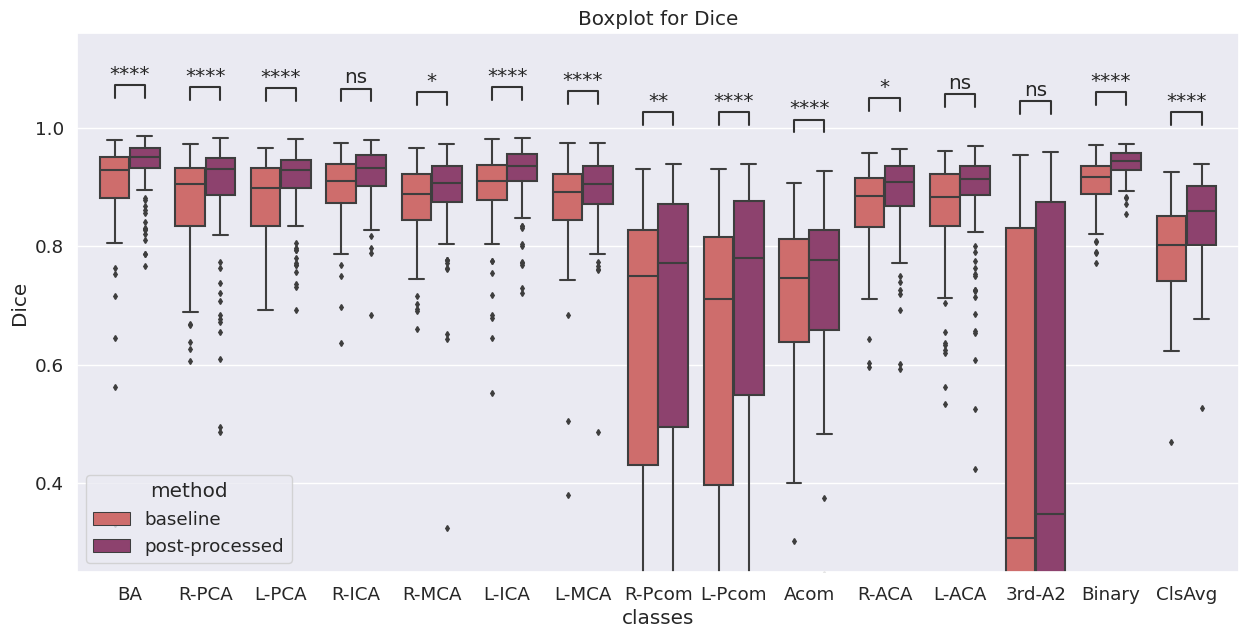

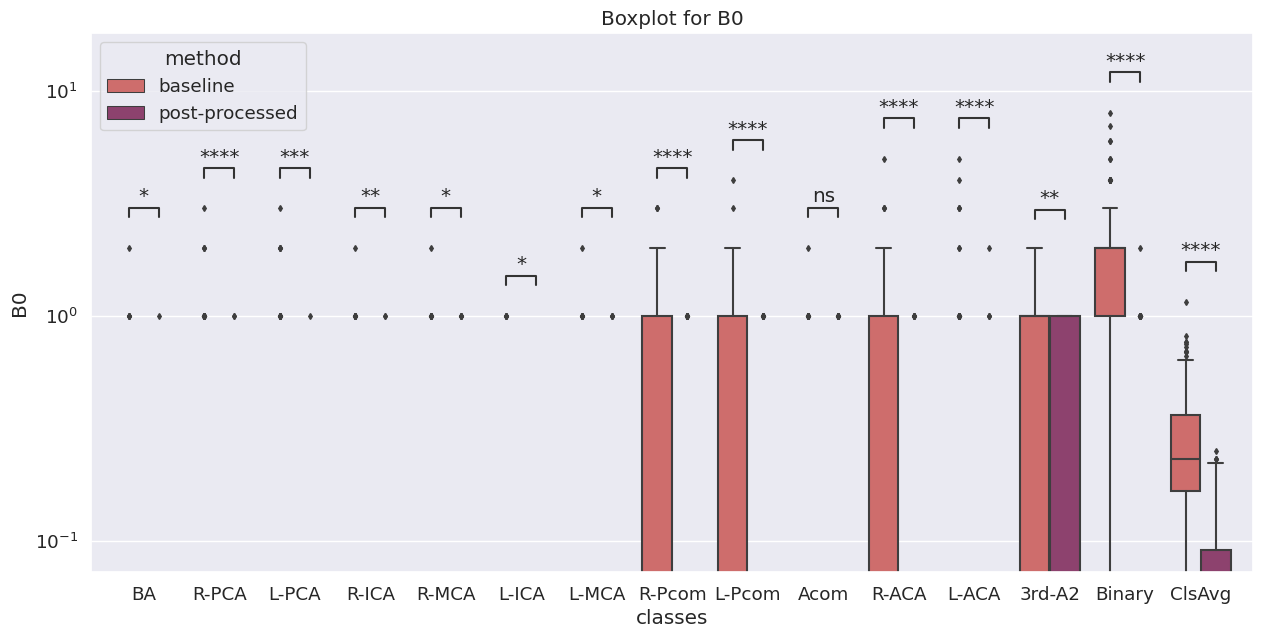

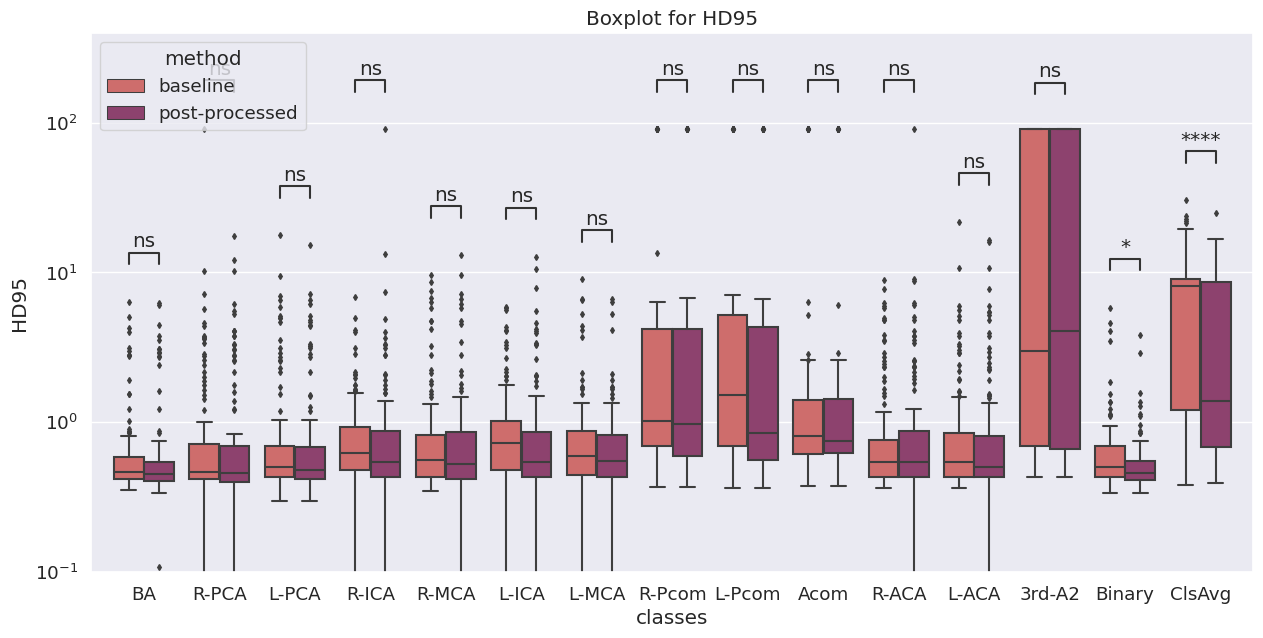

In [19]:
''' Get the boxplots with t-test for cross-val (CTA and MRA) + crown (MRA) '''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_MRA_bin802_mul808_skr-bindice_nomir_5folds_val-best.tsv', sep='\t')  # MRA
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_final_CTA_bin809_mul806_skr-bindice_nomir_5folds_val-best.tsv', sep='\t')  # CTA
# df_exps = pd.read_csv('/home/hasna/miccai24_challenges/topcow_challenge/metrics/metrics_mra_crown23_skr_bindice_nomir_5folds.tsv', sep='\t') #merged_df.copy()  # CROWN

desired_classes = ['BA', 'R-PCA', 'L-PCA', 'R-ICA', 'R-MCA', 'L-ICA', 'L-MCA', 'R-Pcom', 'L-Pcom', 'Acom', 'R-ACA', 'L-ACA', '3rd-A2', 'Binary', 'ClsAvg']
df_exps['classes'] = df_exps['classes'].replace({'MergedBin': 'Binary', 'ClsAvgB0err': 'ClsAvg'})
df_exps['status'] = df_exps['status'].replace({'without_pp': 'baseline', 'with_pp': 'post-processed'})

# We want to create pairs for each class
pairs = []
for class_name in desired_classes: #df_exps['classes'].unique():    
    pairs.append(((class_name, 'baseline'), (class_name, 'post-processed')))
    
## Cleaning the NaN rows:
nan_rows = df_exps[df_exps['B0'].isna()]
subjects_classes_with_nan = nan_rows[['subjects', 'classes']].drop_duplicates()
df_cleaned = df_exps.copy()
for i, subb in enumerate(subjects_classes_with_nan.subjects):
    for classs in subjects_classes_with_nan[subjects_classes_with_nan['subjects'] == subb]['classes']:
        df_cleaned = df_cleaned[~((df_cleaned['subjects'] == subb) & (df_cleaned['classes'] == classs))]


df_cleaned.rename(columns={'status': 'method'}, inplace=True)

for met in ['Dice', 'B0', 'HD95']:
    hue_plot_params = {
        'data': df_cleaned,
        'x': 'classes',
        'y': met,
        "hue": "method",
        "palette": 'flare',  # 'flare' or 'crest'
        "width": 0.8, 
        "fliersize": 3,
        "order":desired_classes, 
    }
    sns.set_theme(rc={'figure.figsize':(15,7)})
    sns.set_theme(font_scale=1.2)
    ax = sns.boxplot( **hue_plot_params)
    
    
    if not met == 'Dice':
        ax.set_yscale('log')  # FIXME:
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_paired", verbose=0).apply_and_annotate()  # FIXME: should be 't-test_paired' but some subjects might not have a value for both status..
    if met == 'Dice':
        # ax.set_ylim(bottom=0.45)  # FIXME: For MRA
        # ax.set_ylim(bottom=0.25)  # FIXME: For CTA
        ax.set_ylim(bottom=0.25)  # FIXME: For CROWN
    elif met == 'B0':
        pass  # FIXME: For MRA/CTA
    elif met == 'HD95':
        #pass  # FIXME: For MRA
        # ax.set_ylim(bottom=0.1)  # FIXME: For CTA
        ax.set_ylim(bottom=0.1)  # FIXME: For CROWN
    # ax.legend(loc=(1.0, 0.88))
    # ax.legend(loc="lower right")  #, markerscale=1, fontsize=10)  # Example to position it to the right outside
    plt.title(f'Boxplot for {met}')
    plt.show()
